In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
### We have to find a better way to work with this.
import sys
#sys.path.append('/Volumes/MacBookHD/Projects/PyPharmer_devel/') #Path for Angel in ashrey
#sys.path.append ('/home/angel/Documents/angel/projects/PyPharmer_devel/') #path for Angel in balmunt 
#sys.path.append('/home/diego/Trabajo/Proyectos/PyPharmer_devel/') # path for Diego
sys.path.append ('/Projects/PyPharmer_devel/') #path for angel in Groningen
import matplotlib as mt
from matplotlib import pylab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import itertools as it
import networkx as nx
import numpy as np
import PyPharmer as phr
from PyPharmer import clique_analyzer as c_analyzer
import simplejson as json
import os 
from pprint import pprint

## Load files

In [11]:
json_file1='../Server_Files/ZINCpharmer.json'
json_file2='../Server_Files/pharmit.json'
json_file3='../Server_Files/gold_soln_l2199_3D_H_Ch_m1_4.json'
benchmark='../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_B_STI.json'

## Saving points values using PyPharmer

In [12]:
data=phr.Descriptors (benchmark,select='enabled')

In [13]:
data.points

array([['Aromatic', 11.96, 61.004, 12.143, 1.1, 0, 0, 0],
       ['HydrogenDonor', 14.95, 55.73, 12.124, 0.5, 0, 0, 0],
       ['HydrogenDonor', 16.706, 51.802, 14.687, 0.5, 0, 0, 0],
       ['HydrogenAcceptor', 10.974, 60.526, 11.274, 0.5, 0, 0, 0],
       ['HydrogenAcceptor', 14.956, 52.572, 15.968, 0.5, 0, 0, 0],
       ['Hydrophobic', 11.96, 61.004, 12.143, 1, 0, 0, 0],
       ['Hydrophobic', 16.885, 53.668, 12.474, 1, 0, 0, 0],
       ['Hydrophobic', 17.235, 55.494, 10.11, 1, 0, 0, 0]], dtype=object)

# Save descriptors in a clique GRAPH

BCR_ABL_path= '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/'
ligands = []
for filename in os.listdir(BCR_ABL_path):
    if '.json' in filename:
        ligands.append(BCR_ABL_path+filename)
pprint (ligands)

G= nx.Graph (pharmacophore='descriptors')
for file in ligands:
    data=phr.Descriptors (input_file=file,select='enabled')
    for point  in data.points:
        node=(point[1],point[2],point[3],point[4])
        G.add_node (node_for_adding=node, name=point[0])
        result=list(it.combinations(G.nodes,2))
        for j in list(result):
            G.add_edge (j[0],j[1])

color_code={ 'Hydrophobic':        [0.100, 1.000, 0.000],\
             'HydrogenAcceptor':   [1.000, 0.84, 0.000],\
             'HydrogenDonor':      [1.000, 1.000, 1.000],\
             'Aromatic':           [0.627, 0.1254, 0.941],\
             'NegativeIon':        [1.00, 0.00, 0.00],\
             'PositiveIon':        [0.00, 0.00, 1.00],\
             'InclusionSphere':    [0.00, 1.00, 1.00],\
             'Other':              [0.74, 0.74, 0.74],\
             'PhenylalanineAnalog':[1.0, 1.0, 0.0],\
             'LeuValAnalog':       [1.0, 1.0, 0.0] \
             }

options = {'node_color': color_code[G.nodes[node]['name']],
           'node_size': 100,
           'width': 1,
           }


nx.draw_spectral (G,**options)
print ('Number or Nodes:', G.number_of_nodes(),' ','Number of Edges:',G.number_of_edges ())

# Adding the RMSD funtion between descriptors

data.points

combinations=list(it.combinations(data.points,2))
len (combinations)

point_A=[]
point_B=[]
G= nx.Graph (pharmacophore='descriptors')
for point in combinations:
    point_1=np.array((point[0][1],point[0][2],point[0][3]))
    point_2= np.array ((point[1][1],point[1][2],point[1][3]))
    dist = np.linalg.norm (point_1-point_2)
    #rmsd=((0.5)*(dist**2))**(1/2)
    if dist >= 2. and point [0][0] != point[1][0]:
        point_A.append (point[0])
        point_B.append (point[1])
        
        for point  in point_A:
            for point in point_B:
                node=(point[1],point[2],point[3],point[4])
                G.add_node (node_for_adding=node, name=point[0])
                result=list(it.combinations(G.nodes,2))
                for j in list(result):
                    G.add_edge (j[0],j[1])

color_code={ 'Hydrophobic':        [0.100, 1.000, 0.000],\
             'HydrogenAcceptor':   [1.000, 0.84, 0.000],\
             'HydrogenDonor':      [1.000, 1.000, 1.000],\
             'Aromatic':           [0.627, 0.1254, 0.941],\
             'NegativeIon':        [1.00, 0.00, 0.00],\
             'PositiveIon':        [0.00, 0.00, 1.00],\
             'InclusionSphere':    [0.00, 1.00, 1.00],\
             'Other':              [0.74, 0.74, 0.74],\
             'PhenylalanineAnalog':[1.0, 1.0, 0.0],\
             'LeuValAnalog':       [1.0, 1.0, 0.0] \
             }

options = {'node_color': color_code[G.nodes[node]['name']],
           'node_size': 100,
           'width': 1,
           }


nx.draw (G,**options)
print ('Number or Nodes:', G.number_of_nodes(),' ','Number of Edges:',G.number_of_edges ())

# All together

In [14]:
BCR_ABL_path= '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/'
ligands = []
for filename in os.listdir(BCR_ABL_path):
    if '.json' in filename:
        ligands.append(BCR_ABL_path+filename)
pprint (ligands)

['../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1fpu_A_PRC.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1fpu_B_PRC.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_A_STI.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1iep_B_STI.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1opj_A_STI.json',
 '../benchmarks/BCR-ABL_Tyrosin_Kinase_Inhibitors/1opj_B_STI.json']


In [20]:
point_A=[]
point_B=[]
G= nx.Graph (pharmacophore='descriptors')
for file in ligands:
    data=phr.Descriptors (input_file=file,select='enabled')
    combinations=list(it.combinations(data.points,2))
    for point in combinations:
        index=range (len(data.points))
        point_1=np.array((point[0][1],point[0][2],point[0][3]))
        point_2= np.array ((point[1][1],point[1][2],point[1][3]))
        dist = np.linalg.norm (point_1-point_2)
        #rmsd=((0.5)*(dist**2))**(1/2)
        if dist >= 2. and point [0][0] != point[1][0]:
            point_A.append (point[0])
            point_B.append (point[1])        

In [21]:
point_A

[array(['Aromatic', 11.636, 60.16, 12.085, 1.1, 0, 0, 0], dtype=object),
 array(['Aromatic', 11.636, 60.16, 12.085, 1.1, 0, 0, 0], dtype=object),
 array(['Aromatic', 11.636, 60.16, 12.085, 1.1, 0, 0, 0], dtype=object),
 array(['Aromatic', 11.636, 60.16, 12.085, 1.1, 0, 0, 0], dtype=object),
 array(['Aromatic', 11.636, 60.16, 12.085, 1.1, 0, 0, 0], dtype=object),
 array(['Aromatic', 11.636, 60.16, 12.085, 1.1, 0, 0, 0], dtype=object),
 array(['HydrogenDonor', 14.657, 55.013, 12.152, 0.5, 0, 0, 0],
       dtype=object),
 array(['HydrogenDonor', 14.657, 55.013, 12.152, 0.5, 0, 0, 0],
       dtype=object),
 array(['HydrogenDonor', 14.657, 55.013, 12.152, 0.5, 0, 0, 0],
       dtype=object),
 array(['HydrogenDonor', 14.657, 55.013, 12.152, 0.5, 0, 0, 0],
       dtype=object),
 array(['HydrogenDonor', 14.657, 55.013, 12.152, 0.5, 0, 0, 0],
       dtype=object),
 array(['HydrogenDonor', 14.657, 55.013, 12.152, 0.5, 0, 0, 0],
       dtype=object),
 array(['HydrogenDonor', 16.661, 51.228, 14.53

In [22]:
for point  in point_A:
                for point in point_B:
                    node=(point[1],point[2],point[3],point[4])
                    G.add_node (node_for_adding=node, name=point[0])
                    result=list(it.combinations(G.nodes,2))
                    for j in list(result):
                        G.add_edge (j[0],j[1])

<IPython.core.display.Javascript object>


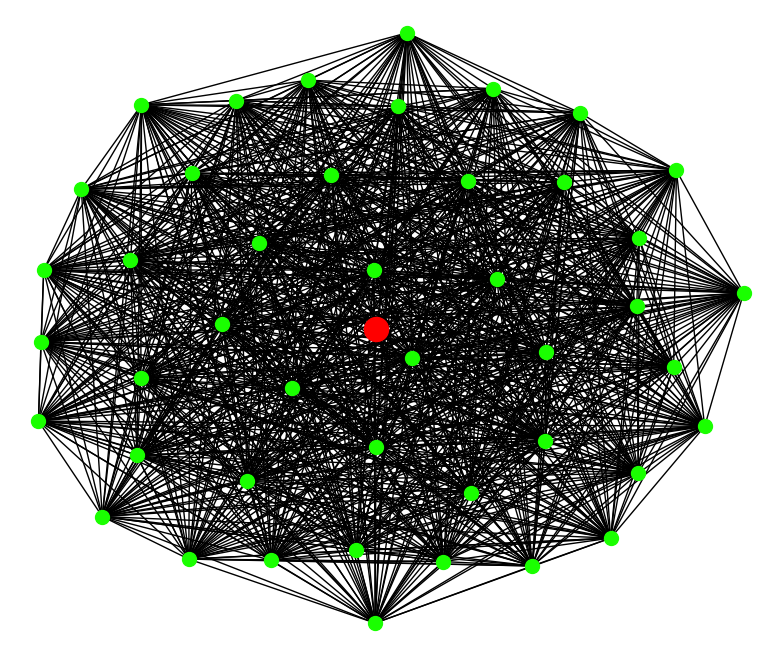

Number or Nodes: 44   Number of Edges: 946


In [23]:
color_code={ 'Hydrophobic':        [0.100, 1.000, 0.000],\
             'HydrogenAcceptor':   [1.000, 0.84, 0.000],\
             'HydrogenDonor':      [1.000, 1.000, 1.000],\
             'Aromatic':           [0.627, 0.1254, 0.941],\
             'NegativeIon':        [1.00, 0.00, 0.00],\
             'PositiveIon':        [0.00, 0.00, 1.00],\
             'InclusionSphere':    [0.00, 1.00, 1.00],\
             'Other':              [0.74, 0.74, 0.74],\
             'PhenylalanineAnalog':[1.0, 1.0, 0.0],\
             'LeuValAnalog':       [1.0, 1.0, 0.0] \
             }

options = {'node_color': color_code[G.nodes[node]['name']],
           'node_size': 100,
           'width': 1,
          }


nx.draw (G,**options)
print ('Number or Nodes:', G.number_of_nodes(),' ','Number of Edges:',G.number_of_edges ())

In [24]:
G.nodes.data ()

NodeDataView({(14.657, 55.013, 12.152, 0.5): {'name': 'HydrogenDonor'}, (16.661, 51.228, 14.538, 0.5): {'name': 'HydrogenDonor'}, (14.823, 51.786, 15.735, 0.5): {'name': 'HydrogenAcceptor'}, (16.702, 53.106, 12.417, 1): {'name': 'Hydrophobic'}, (16.107, 48.795, 17.282, 1): {'name': 'Hydrophobic'}, (16.912, 54.912, 10.105, 1): {'name': 'Hydrophobic'}, (10.615, 59.639, 11.334, 0.5): {'name': 'HydrogenAcceptor'}, (11.636, 60.16, 12.085, 1): {'name': 'Hydrophobic'}, (14.108, 54.572, 12.978, 0.5): {'name': 'HydrogenDonor'}, (16.006, 50.684, 15.318, 0.5): {'name': 'HydrogenDonor'}, (13.797, 50.659, 15.803, 0.5): {'name': 'HydrogenAcceptor'}, (16.069, 52.539, 13.146, 1): {'name': 'Hydrophobic'}, (15.211, 48.225, 18.054, 1): {'name': 'Hydrophobic'}, (16.333, 54.305, 10.797, 1): {'name': 'Hydrophobic'}, (10.479, 59.572, 11.247, 0.5): {'name': 'HydrogenAcceptor'}, (11.454, 59.997, 12.107, 1): {'name': 'Hydrophobic'}, (14.852, 55.627, 12.128, 0.5): {'name': 'HydrogenDonor'}, (16.6, 51.81, 14.798,

In [25]:
clique=nx.find_cliques (G)

In [28]:
jo=nx.enumerate_all_cliques (G)

In [31]:
mx=nx.make_max_clique_graph (G)

In [33]:
nx.draw (mx)

In [34]:
mx.nodes.data ()

NodeDataView({0: {}})